# ***`Artificial Neural Networks `***

### Packages & Modules

In [1]:
#Import Packages & Modules

import numpy as np
import pandas as pd

import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

np.random.seed(42)
import tensorflow as tf
from tensorflow import keras



## ***`Image Classification `***

### Dataset

In [2]:
    # DataLoader (The fashion MNIST dataset)
fashion_mnist = keras.datasets.fashion_mnist
    # Process the data and split into a training and test set
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print("The training set ", X_train_full.shape) #The training set contains 60 000 grayscale images, each 28x28 pixels
print("The test set ",X_test.shape) #The test set contains 10 000 grayscale images, each 28x28 pixels

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

#The full training set is splitted into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

print("The validation set ",X_valid.shape) #The test set contains 5 000 grayscale images, each 28x28 pixels
print("The training set ",X_train.shape) #The test set contains 55 000 grayscale images, each 28x28 pixels


The training set  (60000, 28, 28)
The test set  (10000, 28, 28)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The validation set  (5000, 28, 28)
The training set  (55000, 28, 28)


### Plotting Images

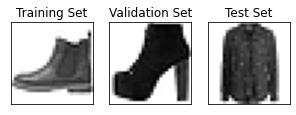

In [3]:
#Display Images

plt.subplots(figsize=(5, 5))
plt.subplot(231)
plt.title('Training Set')
plt.imshow(X_train[44], cmap="binary")
plt.xticks([]), plt.yticks([])

plt.subplot(232)
plt.title('Validation Set')
plt.imshow(X_valid[44], cmap="binary")
plt.xticks([]), plt.yticks([])
        
plt.subplot(233)
plt.title('Test Set')
plt.imshow(X_test[44], cmap="binary")
plt.xticks([]), plt.yticks([])

plt.show()

### Class Names

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#Training Set
print("Class name of the training image : ",class_names[y_train[44]])
#Validation Set
print("Class name of the validation image : ",class_names[y_valid[44]])
#Test Set
print("Class name of the test image : ",class_names[y_test[44]])


Class name of the training image :  Ankle boot
Class name of the validation image :  Ankle boot
Class name of the test image :  Shirt


### Display Images with class names

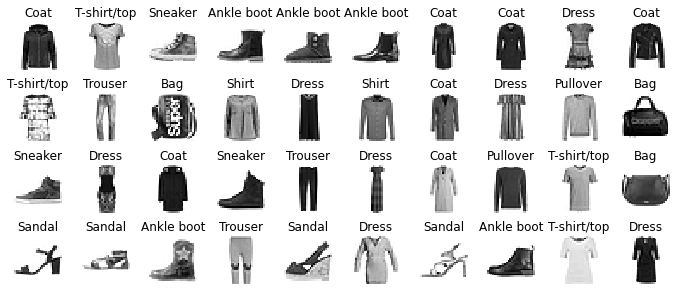

In [5]:
#Training

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()


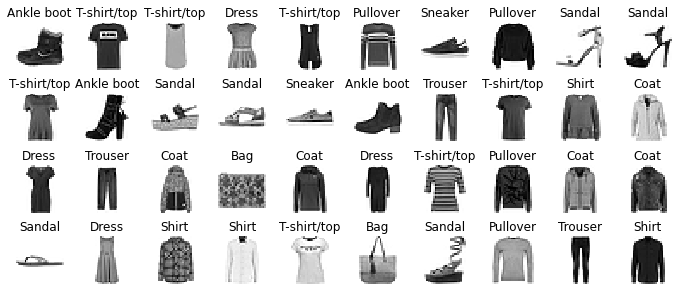

In [6]:
#Validation
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_valid[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_valid[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()


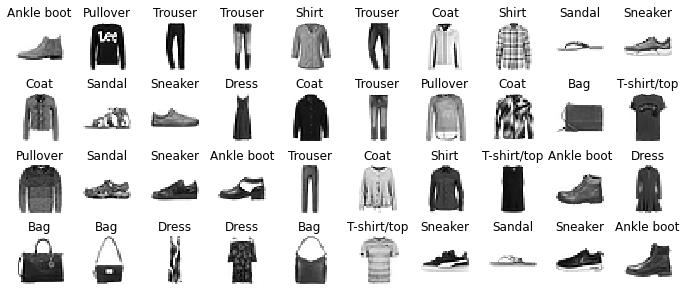

In [7]:
#Test
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()


### Construct the Model

In [8]:
#The Model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
#Layers
model.layers

In [10]:
#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


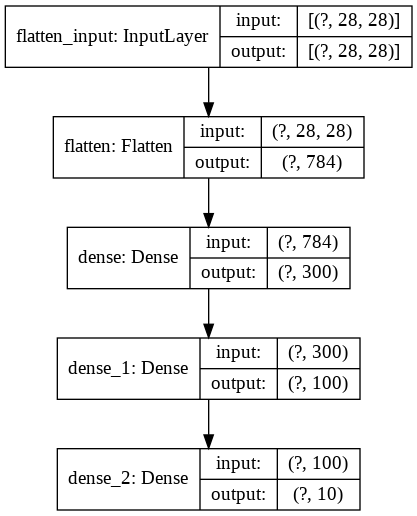

In [11]:
# The Mnist_Model
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [12]:
hidden1 = model.layers[1]
print("Hidden1 : ",hidden1.name)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(model.get_layer(hidden1.name) is hidden1)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~")
weights, biases = hidden1.get_weights()
print("Weights :  \n", weights)
print(" ------> Weights Shape : ", weights.shape)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Biases :  \n", biases)
print(" ------>Biases Shape : ", biases.shape)


Hidden1 :  dense
~~~~~~~~~~~~~~~~~~~~~~~~~~
True
~~~~~~~~~~~~~~~~~~~~~~~~~~
Weights :  
 [[-0.02488465 -0.02652029 -0.03384209 ... -0.03830605 -0.01710562
   0.06502905]
 [ 0.02467458 -0.06877365 -0.06767883 ...  0.05594561 -0.06469668
   0.05844286]
 [ 0.05430654 -0.02343394 -0.03055748 ... -0.037986   -0.07302082
  -0.03312583]
 ...
 [ 0.04279828 -0.03674056 -0.04149555 ... -0.04653038 -0.03127272
  -0.00617824]
 [ 0.03703398 -0.02978528 -0.05295596 ...  0.00729173  0.06908712
   0.04799049]
 [ 0.01179934  0.01840255 -0.03749245 ... -0.00982416 -0.0034064
   0.02372658]]
 ------> Weights Shape :  (784, 300)
~~~~~~~~~~~~~~~~~~~~~~~~~~
Biases :  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

### Compile the Model

In [13]:
#The Loss Function, The Optimizer, The Performance Metric
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### Train the Model

In [14]:
#Batch Size, Epochs
history = model.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7382 - accuracy: 0.7573 - val_loss: 0.5194 - val_accuracy: 0.8246
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4936 - accuracy: 0.8266 - val_loss: 0.4555 - val_accuracy: 0.8456
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4474 - accuracy: 0.8422 - val_loss: 0.4143 - val_accuracy: 0.8618
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4182 - accuracy: 0.8527 - val_loss: 0.4090 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3962 - accuracy: 0.8601 - val_loss: 0.3764 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3798 - accuracy: 0.8659 - val_loss: 0.3783 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3657 - accuracy: 0.8710 - val_loss: 0.3604 - val_accuracy:

In [15]:
print("History Params : ", history.params)
print("History Epoch : ", history.epoch)
print("History Keys : " ,history.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Learning Curves

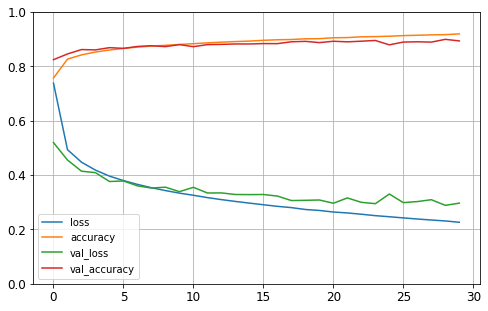

In [16]:
#Plotting Learning Curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
print("Evaluation : ", model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3282 - accuracy: 0.8825
Evaluation :  [0.3281925618648529, 0.8824999928474426]


In [18]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [19]:
y_pred = model.predict_classes(X_new)
print("y_pred : ", y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
y_pred :  [9 2 1]


In [20]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [21]:
y_new = y_test[:3]
print("y_new : ", y_new)

y_new :  [9 2 1]


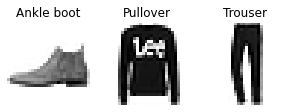

In [22]:
plt.figure(figsize=(5, 5))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# ***`Exercise `***

### Plot Learning curves when using different optimizers

#####RMSprop

In [23]:
#Compile the Model
model.compile(loss="sparse_categorical_crossentropy",optimizer="RMSprop",metrics=["accuracy"])

# Train the Model
history_RMSprop = model.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4266 - accuracy: 0.8485 - val_loss: 0.4166 - val_accuracy: 0.8596
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3664 - accuracy: 0.8715 - val_loss: 0.4108 - val_accuracy: 0.8588
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3502 - accuracy: 0.8785 - val_loss: 0.3929 - val_accuracy: 0.8726
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3404 - accuracy: 0.8829 - val_loss: 0.3947 - val_accuracy: 0.8722
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3331 - accuracy: 0.8873 - val_loss: 0.4427 - val_accuracy: 0.8724
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3241 - accuracy: 0.8878 - val_loss: 0.4245 - val_accuracy: 0.8848
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3219 - accuracy: 0.8930 - val_loss: 0.4791 - val_accuracy:

In [24]:
#History
print("History Params : ", history_RMSprop.params)
print("History Epoch : ", history_RMSprop.epoch)
print("History Keys : " ,history_RMSprop.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


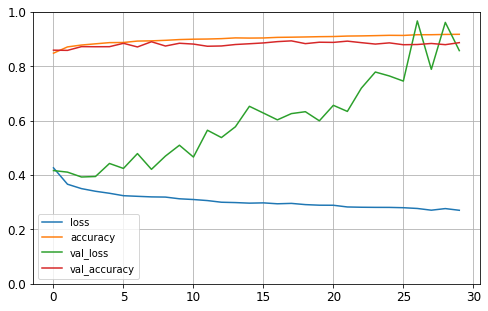

In [25]:
#Learning Curves
pd.DataFrame(history_RMSprop.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#####Adam

In [26]:
#Compile the Model
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

# Train the Model
history_Adam = model.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2977 - accuracy: 0.9094 - val_loss: 0.6291 - val_accuracy: 0.8892
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2520 - accuracy: 0.9170 - val_loss: 0.5435 - val_accuracy: 0.8862
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2499 - accuracy: 0.9156 - val_loss: 0.5030 - val_accuracy: 0.8868
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2288 - accuracy: 0.9204 - val_loss: 0.4932 - val_accuracy: 0.8888
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2300 - accuracy: 0.9203 - val_loss: 0.4644 - val_accuracy: 0.8890
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2195 - accuracy: 0.9227 - val_loss: 0.5387 - val_accuracy: 0.8896
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2120 - accuracy: 0.9245 - val_loss: 0.4931 - val_accuracy:

In [27]:
#History
print("History Params : ", history_Adam.params)
print("History Epoch : ", history_Adam.epoch)
print("History Keys : " ,history_Adam.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


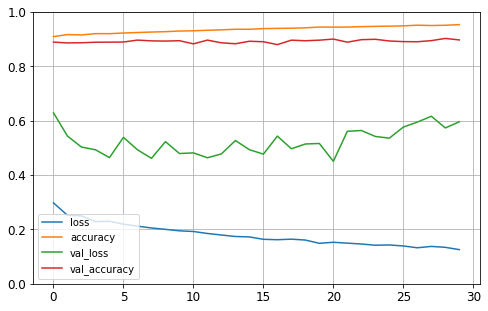

In [28]:
#Learning Curves
pd.DataFrame(history_Adam.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Plot Learning curves when using different batch size

#####Batch Size = 5

In [29]:
#Compile the Model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

# Train the Model
history_Batch5 = model.fit(X_train, y_train, batch_size=5, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
11000/11000 [==============================] - 19s 2ms/step - loss: 0.1856 - accuracy: 0.9381 - val_loss: 0.7173 - val_accuracy: 0.8880
Epoch 2/30
11000/11000 [==============================] - 19s 2ms/step - loss: 0.1510 - accuracy: 0.9473 - val_loss: 0.7630 - val_accuracy: 0.8846
Epoch 3/30
11000/11000 [==============================] - 19s 2ms/step - loss: 0.1296 - accuracy: 0.9547 - val_loss: 0.7823 - val_accuracy: 0.8912
Epoch 4/30
11000/11000 [==============================] - 20s 2ms/step - loss: 0.1165 - accuracy: 0.9590 - val_loss: 0.7889 - val_accuracy: 0.8942
Epoch 5/30
11000/11000 [==============================] - 19s 2ms/step - loss: 0.1096 - accuracy: 0.9597 - val_loss: 0.7915 - val_accuracy: 0.8980
Epoch 6/30
11000/11000 [==============================] - 19s 2ms/step - loss: 0.1084 - accuracy: 0.9597 - val_loss: 0.8408 - val_accuracy: 0.8984
Epoch 7/30
11000/11000 [==============================] - 19s 2ms/step - loss: 0.1028 - accuracy: 0.9625 - val_loss: 0

In [30]:
#History
print("History Params : ", history_Batch5.params)
print("History Epoch : ", history_Batch5.epoch)
print("History Keys : " ,history_Batch5.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 11000}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


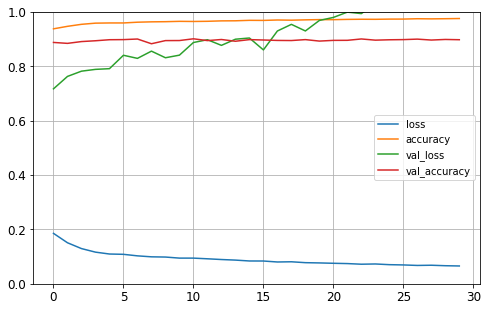

In [31]:
#Learning Curves
pd.DataFrame(history_Batch5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#####Batch Size = 100

In [32]:
#Compile the Model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

# Train the Model
history_Batch100 = model.fit(X_train, y_train, batch_size=100, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
550/550 [==============================] - 1s 2ms/step - loss: 0.0498 - accuracy: 0.9822 - val_loss: 1.0693 - val_accuracy: 0.9030
Epoch 2/30
550/550 [==============================] - 1s 2ms/step - loss: 0.0447 - accuracy: 0.9838 - val_loss: 1.0892 - val_accuracy: 0.9050
Epoch 3/30
550/550 [==============================] - 1s 2ms/step - loss: 0.0435 - accuracy: 0.9844 - val_loss: 1.0976 - val_accuracy: 0.9010
Epoch 4/30
550/550 [==============================] - 1s 2ms/step - loss: 0.0428 - accuracy: 0.9846 - val_loss: 1.0954 - val_accuracy: 0.9040
Epoch 5/30
550/550 [==============================] - 1s 2ms/step - loss: 0.0424 - accuracy: 0.9847 - val_loss: 1.1055 - val_accuracy: 0.9016
Epoch 6/30
550/550 [==============================] - 1s 2ms/step - loss: 0.0421 - accuracy: 0.9847 - val_loss: 1.1102 - val_accuracy: 0.9028
Epoch 7/30
550/550 [==============================] - 1s 2ms/step - loss: 0.0418 - accuracy: 0.9847 - val_loss: 1.1122 - val_accuracy: 0.9024
Epoch 

In [33]:
#History
print("History Params : ", history_Batch100.params)
print("History Epoch : ", history_Batch100.epoch)
print("History Keys : " ,history_Batch100.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 550}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


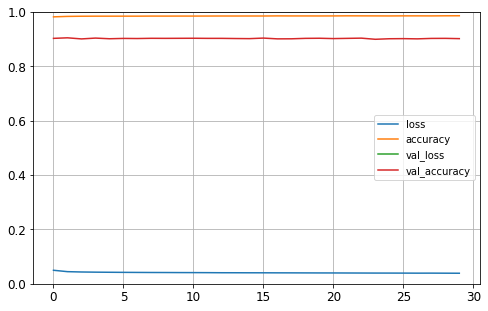

In [34]:
#Learning Curves
pd.DataFrame(history_Batch100.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Plot Learning curves when using different number of epochs

#####Epochs = 10

In [35]:
#Compile the Model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

# Train the Model
history_Epochs10 = model.fit(X_train, y_train, batch_size=32, epochs=10,validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0407 - accuracy: 0.9852 - val_loss: 1.1658 - val_accuracy: 0.9018
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0406 - accuracy: 0.9850 - val_loss: 1.1485 - val_accuracy: 0.9016
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0401 - accuracy: 0.9855 - val_loss: 1.1661 - val_accuracy: 0.9010
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0400 - accuracy: 0.9857 - val_loss: 1.1675 - val_accuracy: 0.9002
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0397 - accuracy: 0.9860 - val_loss: 1.1744 - val_accuracy: 0.9014
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0396 - accuracy: 0.9853 - val_loss: 1.1657 - val_accuracy: 0.9040
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0391 - accuracy: 0.9861 - val_loss: 1.1778 - val_accuracy:

In [43]:
#History
print("History Params : ", history_Epochs10.params)
print("History Epoch : ", history_Epochs10.epoch)
print("History Keys : " ,history_Epochs10.history.keys())

History Params :  {'verbose': 1, 'epochs': 10, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


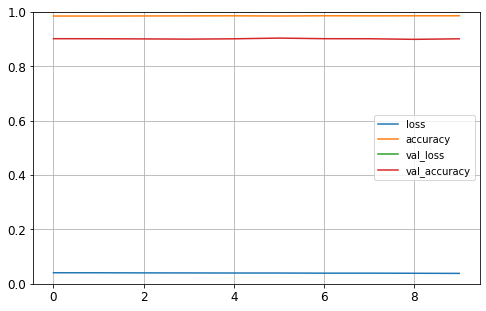

In [44]:
#Learning Curves
pd.DataFrame(history_Epochs10.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#####Epochs = 50

In [48]:
#Compile the Model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

# Train the Model
history_Epochs50 = model.fit(X_train, y_train, batch_size=32, epochs=50,validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0208 - accuracy: 0.9927 - val_loss: 1.6652 - val_accuracy: 0.8980
Epoch 2/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0204 - accuracy: 0.9929 - val_loss: 1.6758 - val_accuracy: 0.8958
Epoch 3/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0205 - accuracy: 0.9929 - val_loss: 1.6746 - val_accuracy: 0.8966
Epoch 4/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0204 - accuracy: 0.9929 - val_loss: 1.6776 - val_accuracy: 0.8966
Epoch 5/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0201 - accuracy: 0.9932 - val_loss: 1.7013 - val_accuracy: 0.8946
Epoch 6/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0202 - accuracy: 0.9930 - val_loss: 1.6790 - val_accuracy: 0.8968
Epoch 7/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0200 - accuracy: 0.9932 - val_loss: 1.6916 - val_accuracy:

In [49]:
#History
print("History Params : ", history_Epochs50.params)
print("History Epoch : ", history_Epochs50.epoch)
print("History Keys : " ,history_Epochs50.history.keys())

History Params :  {'verbose': 1, 'epochs': 50, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


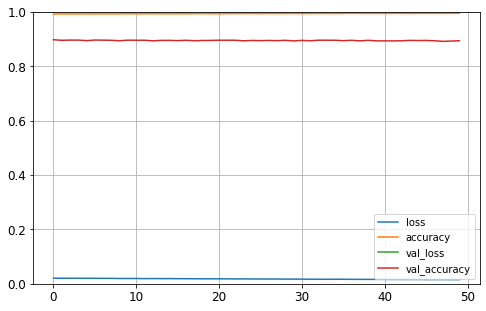

In [50]:
#Learning Curves
pd.DataFrame(history_Epochs50.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Add additional neurons & Use Dropout Layer

In [58]:
# Construct the Model
model_dropout = keras.models.Sequential()
model_dropout.add(keras.layers.Flatten(input_shape=[28, 28]))
model_dropout.add(keras.layers.Dense(300, activation="relu"))
model_dropout.add(keras.layers.Dropout(0.2))
model_dropout.add(keras.layers.Dense(200, activation="relu"))
model_dropout.add(keras.layers.Dropout(0.2))
model_dropout.add(keras.layers.Dense(100, activation="relu"))
model_dropout.add(keras.layers.Dropout(0.2))
model_dropout.add(keras.layers.Dense(50, activation="relu"))
model_dropout.add(keras.layers.Dense(10, activation="softmax"))


In [61]:
#Layers
model_dropout.layers

In [63]:
#Compile the Model
model_dropout.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
# Train the Model
history_dropout = model_dropout.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9808 - accuracy: 0.6465 - val_loss: 0.5500 - val_accuracy: 0.8058
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5923 - accuracy: 0.7880 - val_loss: 0.4695 - val_accuracy: 0.8302
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5153 - accuracy: 0.8175 - val_loss: 0.4183 - val_accuracy: 0.8498
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4704 - accuracy: 0.8314 - val_loss: 0.3940 - val_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4392 - accuracy: 0.8429 - val_loss: 0.3638 - val_accuracy: 0.8722
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4184 - accuracy: 0.8499 - val_loss: 0.3618 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4012 - accuracy: 0.8563 - val_loss: 0.3590 - val_accuracy:

In [64]:
#History
print("History Params : ", history_dropout.params)
print("History Epoch : ", history_dropout.epoch)
print("History Keys : " ,history_dropout.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


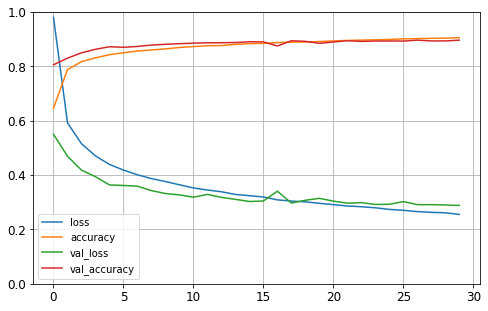

In [65]:
#Learning Curves
pd.DataFrame(history_dropout.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Use Batch Normalisation

In [66]:
# Construct the Model
model_batchNorm = keras.models.Sequential()
model_batchNorm.add(keras.layers.Flatten(input_shape=[28, 28]))

model_batchNorm.add(keras.layers.Dense(300, activation="relu"))
model_batchNorm.add(keras.layers.Dropout(0.2))
model_batchNorm.add(keras.layers.Dense(200, activation="relu"))
model_batchNorm.add(keras.layers.Dropout(0.2))
model_batchNorm.add(keras.layers.Dense(100, activation="relu"))
model_batchNorm.add(keras.layers.Dropout(0.2))
model_batchNorm.add(keras.layers.Dense(50, activation="relu"))

model_batchNorm.add(keras.layers.BatchNormalization())

model_batchNorm.add(keras.layers.Dense(10, activation="softmax"))


In [68]:
#Compile the Model
model_batchNorm.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

# Train the Model
history_batchNorm= model_dropout.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2531 - accuracy: 0.9071 - val_loss: 0.2889 - val_accuracy: 0.8938
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9076 - val_loss: 0.2939 - val_accuracy: 0.8904
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2462 - accuracy: 0.9089 - val_loss: 0.2973 - val_accuracy: 0.8946
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2425 - accuracy: 0.9094 - val_loss: 0.2897 - val_accuracy: 0.8970
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2409 - accuracy: 0.9093 - val_loss: 0.2935 - val_accuracy: 0.8922
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2377 - accuracy: 0.9121 - val_loss: 0.3014 - val_accuracy: 0.8944
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2356 - accuracy: 0.9122 - val_loss: 0.2874 - val_accuracy:

In [69]:
#History
print("History Params : ", history_batchNorm.params)
print("History Epoch : ", history_batchNorm.epoch)
print("History Keys : " ,history_batchNorm.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


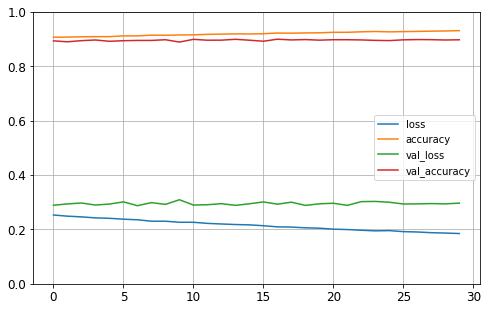

In [70]:
#Learning Curves
pd.DataFrame(history_batchNorm.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Repeat with more Layers

In [71]:
# Construct the Model

model_newModel = keras.models.Sequential()
model_newModel.add(keras.layers.Flatten(input_shape=[28, 28]))

model_newModel.add(keras.layers.Dense(300, activation="relu"))
model_newModel.add(keras.layers.Dropout(0.2))
model_newModel.add(keras.layers.Dense(250, activation="relu"))
model_newModel.add(keras.layers.Dropout(0.2))
model_newModel.add(keras.layers.Dense(200, activation="relu"))
model_newModel.add(keras.layers.Dropout(0.2))
model_newModel.add(keras.layers.Dense(150, activation="relu"))
model_newModel.add(keras.layers.Dropout(0.2))
model_newModel.add(keras.layers.Dense(100, activation="relu"))
model_newModel.add(keras.layers.Dropout(0.2))
model_newModel.add(keras.layers.Dense(50, activation="relu"))

model_newModel.add(keras.layers.BatchNormalization())

model_newModel.add(keras.layers.Dense(10, activation="softmax"))


In [72]:
model_newModel.layers

In [73]:
#Compile the Model
model_newModel.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

# Train the Model
history_newModel= model_newModel.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9283 - accuracy: 0.6680 - val_loss: 0.5007 - val_accuracy: 0.8220
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5998 - accuracy: 0.7907 - val_loss: 0.4258 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5236 - accuracy: 0.8192 - val_loss: 0.3989 - val_accuracy: 0.8610
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4817 - accuracy: 0.8344 - val_loss: 0.3817 - val_accuracy: 0.8666
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4522 - accuracy: 0.8425 - val_loss: 0.3527 - val_accuracy: 0.8748
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4340 - accuracy: 0.8484 - val_loss: 0.3633 - val_accuracy: 0.8742
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4139 - accuracy: 0.8563 - val_loss: 0.3493 - val_accuracy:

In [75]:
#History
print("History Params : ", history_newModel.params)
print("History Epoch : ", history_newModel.epoch)
print("History Keys : " ,history_newModel.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


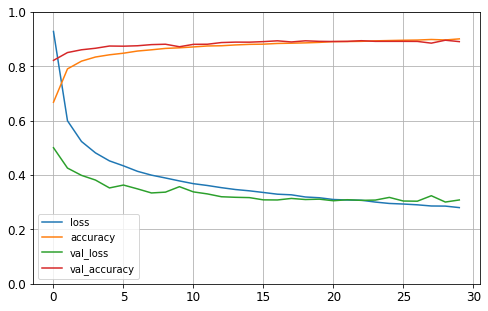

In [74]:
#Learning Curves
pd.DataFrame(history_newModel.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## ***`Apply on Different Datasets `***

###Dataset

In [76]:
from keras.datasets import mnist

    # DataLoader (The MNIST handwritten digits dataset)
mnist = keras.datasets.mnist
    # Process the data and split into a training and test set
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

print("The training set ", X_train_full.shape) #The training set contains 60 000 grayscale images, each 28x28 pixels
print("The test set ",X_test.shape) #The test set contains 10 000 grayscale images, each 28x28 pixels

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

#The full training set is splitted into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

print("The validation set ",X_valid.shape) #The test set contains 5 000 grayscale images, each 28x28 pixels
print("The training set ",X_train.shape) #The test set contains 55 000 grayscale images, each 28x28 pixels


11493376/11490434 [==============================] - 0s 0us/step
The training set  (60000, 28, 28)
The test set  (10000, 28, 28)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The validation set  (5000, 28, 28)
The training set  (55000, 28, 28)


### Plotting Images

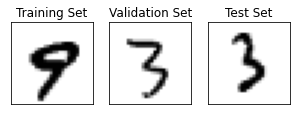

In [77]:
#Display Images

plt.subplots(figsize=(5, 5))
plt.subplot(231)
plt.title('Training Set')
plt.imshow(X_train[44], cmap="binary")
plt.xticks([]), plt.yticks([])

plt.subplot(232)
plt.title('Validation Set')
plt.imshow(X_valid[44], cmap="binary")
plt.xticks([]), plt.yticks([])
        
plt.subplot(233)
plt.title('Test Set')
plt.imshow(X_test[44], cmap="binary")
plt.xticks([]), plt.yticks([])

plt.show()

### Class Names

In [78]:
class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

#Training Set
print("Class name of the training image : ",class_names[y_train[44]])
#Validation Set
print("Class name of the validation image : ",class_names[y_valid[44]])
#Test Set
print("Class name of the test image : ",class_names[y_test[44]])


Class name of the training image :  9
Class name of the validation image :  3
Class name of the test image :  3


### Display Images with class names

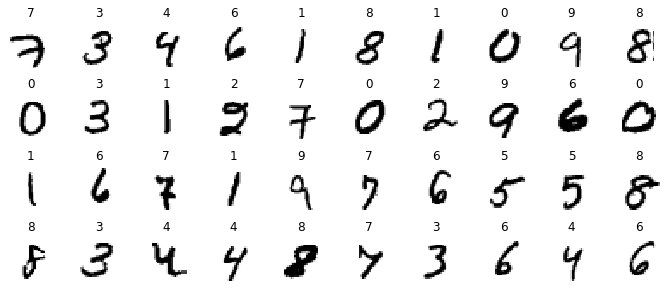

In [79]:
#Training

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()


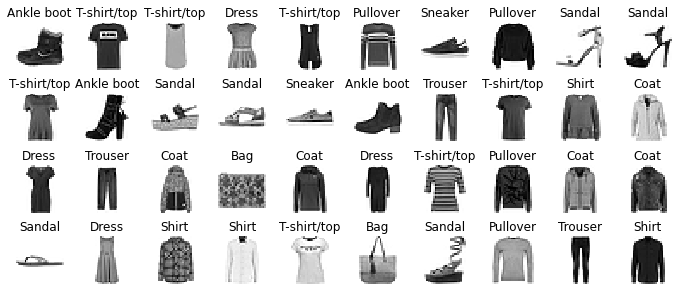

In [ ]:
#Validation
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_valid[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_valid[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()


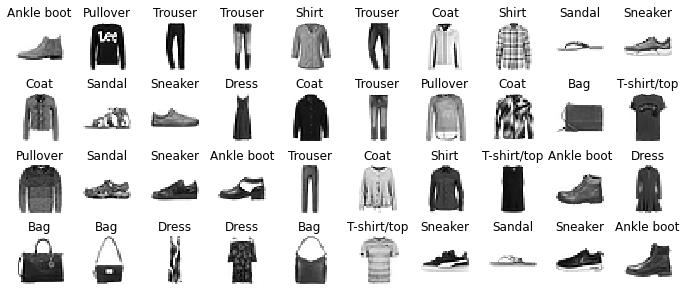

In [ ]:
#Test
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()


### Construct the Model

In [84]:
#The Model
handwritten_model = keras.models.Sequential()
handwritten_model.add(keras.layers.Flatten(input_shape=[28, 28]))
handwritten_model.add(keras.layers.Dense(300, activation="relu"))
handwritten_model.add(keras.layers.Dropout(0.2))
handwritten_model.add(keras.layers.Dense(200, activation="relu"))
handwritten_model.add(keras.layers.Dropout(0.2))
handwritten_model.add(keras.layers.Dense(100, activation="relu"))

handwritten_model.add(keras.layers.BatchNormalization())

handwritten_model.add(keras.layers.Dense(10, activation="softmax"))

In [85]:
#Layers
handwritten_model.layers

In [86]:
#Summary
handwritten_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout_16 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_17 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

In [87]:
hidden1 = handwritten_model.layers[1]
print("Hidden1 : ",hidden1.name)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(handwritten_model.get_layer(hidden1.name) is hidden1)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~")
weights, biases = hidden1.get_weights()
print("Weights :  \n", weights)
print(" ------> Weights Shape : ", weights.shape)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Biases :  \n", biases)
print(" ------>Biases Shape : ", biases.shape)


Hidden1 :  dense_27
~~~~~~~~~~~~~~~~~~~~~~~~~~
True
~~~~~~~~~~~~~~~~~~~~~~~~~~
Weights :  
 [[-0.05912825  0.04666144  0.04374586 ...  0.02892551 -0.06191519
   0.0211781 ]
 [-0.04418116  0.06815548 -0.057623   ...  0.04600426 -0.01669006
   0.00378302]
 [ 0.07016005  0.05718318 -0.03534278 ... -0.00126586  0.04531601
   0.0307653 ]
 ...
 [-0.0446675   0.07158364  0.02683759 ... -0.02996683  0.0333047
   0.02534466]
 [ 0.0381824  -0.03714607  0.03485366 ... -0.05326562 -0.0552664
   0.04605787]
 [-0.041675    0.00915352 -0.06895892 ... -0.06082782 -0.00150717
  -0.04156479]]
 ------> Weights Shape :  (784, 300)
~~~~~~~~~~~~~~~~~~~~~~~~~~
Biases :  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

### Compile the Model

In [88]:
#The Loss Function, The Optimizer, The Performance Metric
handwritten_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### Train the Model

In [91]:
#Batch Size, Epochs
handwritten_history = handwritten_model.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0276 - accuracy: 0.9910 - val_loss: 0.0587 - val_accuracy: 0.9852
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0623 - val_accuracy: 0.9834
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0251 - accuracy: 0.9915 - val_loss: 0.0618 - val_accuracy: 0.9846
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0584 - val_accuracy: 0.9864
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0235 - accuracy: 0.9921 - val_loss: 0.0595 - val_accuracy: 0.9844
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.0611 - val_accuracy: 0.9854
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9929 - val_loss: 0.0615 - val_accuracy:

In [92]:
print("History Params : ", handwritten_history.params)
print("History Epoch : ", handwritten_history.epoch)
print("History Keys : " ,handwritten_history.history.keys())

History Params :  {'verbose': 1, 'epochs': 30, 'steps': 1719}
History Epoch :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
History Keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Learning Curves

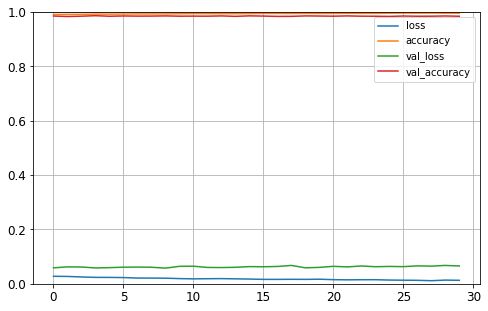

In [93]:
#Plotting Learning Curves
pd.DataFrame(handwritten_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [94]:
print("Evaluation : ", handwritten_model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9840
Evaluation :  [0.07116729766130447, 0.984000027179718]


In [95]:
X_new = X_test[:3]
y_proba = handwritten_model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [96]:
y_pred = handwritten_model.predict_classes(X_new)
print("y_pred : ", y_pred)

y_pred :  [7 2 1]


In [97]:
np.array(class_names)[y_pred]

array(['7', '2', '1'], dtype='<U1')

In [98]:
y_new = y_test[:3]
print("y_new : ", y_new)

y_new :  [7 2 1]


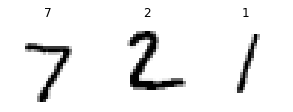

In [99]:
plt.figure(figsize=(5, 5))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()